In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]


     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0       

In [2]:
import pandas as pd

# Select numeric columns
numeric_cols = dataset_as_given.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = dataset_as_given[col].quantile(0.25)
    Q3 = dataset_as_given[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = dataset_as_given[(dataset_as_given[col] < lower_bound) | 
                                (dataset_as_given[col] > upper_bound)][col]

    outlier_summary[col] = {
        'num_outliers': outliers.count(),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_values': outliers.values
    }

# Display results
for col, info in outlier_summary.items():
    print(f"Column: {col}")
    print(f"  Number of outliers: {info['num_outliers']}")
    print(f"  Lower bound: {info['lower_bound']:.2f}")
    print(f"  Upper bound: {info['upper_bound']:.2f}")
    print()


Column: Age
  Number of outliers: 0
  Lower bound: -3.50
  Upper bound: 80.50

Column: Weight (kg)
  Number of outliers: 9
  Lower bound: 16.25
  Upper bound: 127.85

Column: Height (m)
  Number of outliers: 0
  Lower bound: 1.35
  Upper bound: 2.07

Column: Max_BPM
  Number of outliers: 0
  Lower bound: 140.00
  Upper bound: 220.00

Column: Avg_BPM
  Number of outliers: 0
  Lower bound: 93.50
  Upper bound: 193.50

Column: Resting_BPM
  Number of outliers: 0
  Lower bound: 38.00
  Upper bound: 86.00

Column: Session_Duration (hours)
  Number of outliers: 0
  Lower bound: 0.41
  Upper bound: 2.09

Column: Calories_Burned
  Number of outliers: 10
  Lower bound: 186.00
  Upper bound: 1610.00

Column: Fat_Percentage
  Number of outliers: 0
  Lower bound: 9.30
  Upper bound: 41.30

Column: Water_Intake (liters)
  Number of outliers: 0
  Lower bound: 0.85
  Upper bound: 4.45

Column: Workout_Frequency (days/week)
  Number of outliers: 0
  Lower bound: 1.50
  Upper bound: 5.50

Column: Exper

Using the interquartile range (IQR) method, it was found that several numerical columns in the dataset contain outliers.<br>

In [3]:
import pandas as pd

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

cleaned_df.shape


(931, 15)

In [4]:
print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


Original rows: 973
Cleaned rows: 931
Rows removed: 42


In [5]:

#dataset_as_given_numeric
def normality_tests(series):
    series = series.dropna()
    
    shapiro_p = shapiro(series)[1]
    ks_p = kstest(series, 'norm')[1]
    ad_stat = anderson(series, dist='norm').statistic
    
    return shapiro_p, ks_p, ad_stat


######################################################################
results = {}

for col in dataset_as_given_numeric.columns:
    shapiro_p, ks_p, ad_stat = normality_tests(dataset_as_given_numeric[col])
    results[col] = {
        'Shapiro_p': round(shapiro_p, 5),#Shapiro-Wilk Test
        'KS_p': round(ks_p, 5),#Kolmogorov-Smirnov (K-S) Test
        'AD_stat': round(ad_stat, 5)#Anderson-Darling Test
    }

import pandas as pd
normality_report = pd.DataFrame(results).T
print(normality_report)


                               Shapiro_p  KS_p   AD_stat
Age                              0.00000   0.0  12.27066
Weight (kg)                      0.00000   0.0  15.34705
Height (m)                       0.00000   0.0   6.85196
Max_BPM                          0.00000   0.0  10.85213
Avg_BPM                          0.00000   0.0  11.80120
Resting_BPM                      0.00000   0.0  11.51197
Session_Duration (hours)         0.00000   0.0   2.82223
Calories_Burned                  0.00003   0.0   1.14059
Fat_Percentage                   0.00000   0.0  14.24644
Water_Intake (liters)            0.00000   0.0  12.28237
Workout_Frequency (days/week)    0.00000   0.0  49.01432
Experience_Level                 0.00000   0.0  82.04765
BMI                              0.00000   0.0   6.42105


In [6]:
import pandas as pd
import numpy as np
from scipy.stats import kstest

# 1. Select numeric columns only
numeric_df = dataset_as_given.select_dtypes(include=['float64', 'int64'])

# 2. Function to standardise and run KS test
def ks_normality(series):
    series = series.dropna()
    
    # Standardise the data
    z = (series - series.mean()) / series.std()
    
    # Run KS test against standard normal distribution
    stat, p = kstest(z, 'norm')
    return stat, p

# 3. Apply to all numeric columns
results = {}

for col in numeric_df.columns:
    stat, p = ks_normality(numeric_df[col])
    results[col] = {'KS_stat': stat, 'KS_p': p}

# 4. Convert to a table
ks_report = pd.DataFrame(results).T

ks_report
ks_report['KS_p'] = ks_report['KS_p'].apply(lambda x: f"{x:.6f}")
ks_report



,KS_stat,KS_p
Age,0.077951,0.000014
Weight (kg),0.084419,0.000002
Height (m),0.066863,0.000317
Max_BPM,0.068621,0.000199
Avg_BPM,0.075569,0.000028
Resting_BPM,0.076132,0.000024
Session_Duration (hours),0.046524,0.028696
Calories_Burned,0.028321,0.408484
Fat_Percentage,0.096958,0.000000
Water_Intake (liters),0.101642,0.000000


Nomrmality Tests rerun after getting rid of outlierls.<br>
Shapiro-Wilk still the best one to use due to the dataset size.<br>
Data still considered abnormal.

In [7]:
import pandas as pd

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64'])

# Spearman correlation matrix
spearman_corr = numeric_cols.corr(method='spearman')

spearman_corr


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.027781,-0.017171,-0.021933,0.050431,0.010714,-0.001658,-0.136097,-0.019497,0.052662,0.023917,-0.002844,-0.014391
Weight (kg),-0.027781,1.000000,0.400707,0.060306,-0.023621,-0.047300,0.055365,0.139236,-0.267373,0.405765,0.044683,0.067785,0.818315
Height (m),-0.017171,0.400707,1.000000,-0.016616,-0.008137,-0.004769,-0.005298,0.082327,-0.264496,0.400111,-0.008788,-0.009644,-0.160350
Max_BPM,-0.021933,0.060306,-0.016616,1.000000,-0.050819,0.030561,-0.000045,-0.010302,-0.008509,0.019459,-0.035918,-0.004493,0.084506
Avg_BPM,0.050431,-0.023621,-0.008137,-0.050819,1.000000,0.058353,-0.003728,0.318905,0.030607,-0.030401,-0.032590,-0.020219,-0.027461
Resting_BPM,0.010714,-0.047300,-0.004769,0.030561,0.058353,1.000000,-0.031190,-0.013116,0.003462,-0.003318,-0.017502,-0.003033,-0.048877
Session_Duration (hours),-0.001658,0.055365,-0.005298,-0.000045,-0.003728,-0.031190,1.000000,0.901281,-0.481846,0.285584,0.592831,0.703420,0.039311
Calories_Burned,-0.136097,0.139236,0.082327,-0.010302,0.318905,-0.013116,0.901281,1.000000,-0.504043,0.343607,0.532702,0.649157,0.076158
Fat_Percentage,-0.019497,-0.267373,-0.264496,-0.008509,0.030607,0.003462,-0.481846,-0.504043,1.000000,-0.584329,-0.433791,-0.522012,-0.115696
Water_Intake (liters),0.052662,0.405765,0.400111,0.019459,-0.030401,-0.003318,0.285584,0.343607,-0.584329,1.000000,0.229981,0.288105,0.188124


In [8]:
import scipy.stats as stats
import numpy as np

def spearman_pvalues(df):
    cols = df.columns
    pvals = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for r in cols:
        for c in cols:
            rho, p = stats.spearmanr(df[r], df[c])
            pvals.loc[r, c] = p

    return pvals

spearman_p = spearman_pvalues(numeric_cols)

spearman_p


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,0.000000,3.971654e-01,6.007883e-01,0.503874,1.241282e-01,0.744062,9.597068e-01,3.093803e-05,5.524010e-01,1.083202e-01,4.660752e-01,9.309311e-01,6.610070e-01
Weight (kg),0.397165,0.000000e+00,3.194158e-37,0.065874,4.716116e-01,0.149276,9.134633e-02,2.012758e-05,1.052189e-16,3.282620e-38,1.731289e-01,3.865215e-02,1.187396e-225
Height (m),0.600788,3.194158e-37,0.000000e+00,0.612606,8.041642e-01,0.884470,8.717507e-01,1.197464e-02,2.284680e-16,4.164897e-37,7.888563e-01,7.688630e-01,8.746569e-07
Max_BPM,0.503874,6.587423e-02,6.126065e-01,0.000000,1.212574e-01,0.351618,9.989023e-01,7.535697e-01,7.954268e-01,5.531798e-01,2.735919e-01,8.911019e-01,9.890476e-03
Avg_BPM,0.124128,4.716116e-01,8.041642e-01,0.121257,0.000000e+00,0.075138,9.095478e-01,1.880363e-23,3.508954e-01,3.541482e-01,3.205460e-01,5.377803e-01,4.026337e-01
Resting_BPM,0.744062,1.492759e-01,8.844699e-01,0.351618,7.513760e-02,0.000000,3.417968e-01,6.893851e-01,9.159915e-01,9.194595e-01,5.937976e-01,9.263724e-01,1.361661e-01
Session_Duration (hours),0.959707,9.134633e-02,8.717507e-01,0.998902,9.095478e-01,0.341797,0.000000e+00,0.000000e+00,2.738771e-55,6.230475e-19,1.959071e-89,6.745089e-140,2.307937e-01
Calories_Burned,0.000031,2.012758e-05,1.197464e-02,0.753570,1.880363e-23,0.689385,0.000000e+00,0.000000e+00,3.846340e-61,3.415025e-27,2.298853e-69,1.690787e-112,2.012518e-02
Fat_Percentage,0.552401,1.052189e-16,2.284680e-16,0.795427,3.508954e-01,0.915991,2.738771e-55,3.846340e-61,0.000000e+00,2.441017e-86,5.295873e-44,3.321677e-66,4.042529e-04
Water_Intake (liters),0.108320,3.282620e-38,4.164897e-37,0.553180,3.541482e-01,0.919459,6.230475e-19,3.415025e-27,2.441017e-86,0.000000e+00,1.218581e-12,2.970352e-19,7.290417e-09


In [9]:
combined = spearman_corr.round(3).astype(str) + " (p=" + spearman_p.round(3).astype(str) + ")"
combined


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.0 (p=0.0),-0.028 (p=0.397),-0.017 (p=0.601),-0.022 (p=0.504),0.05 (p=0.124),0.011 (p=0.744),-0.002 (p=0.96),-0.136 (p=0.0),-0.019 (p=0.552),0.053 (p=0.108),0.024 (p=0.466),-0.003 (p=0.931),-0.014 (p=0.661)
Weight (kg),-0.028 (p=0.397),1.0 (p=0.0),0.401 (p=0.0),0.06 (p=0.066),-0.024 (p=0.472),-0.047 (p=0.149),0.055 (p=0.091),0.139 (p=0.0),-0.267 (p=0.0),0.406 (p=0.0),0.045 (p=0.173),0.068 (p=0.039),0.818 (p=0.0)
Height (m),-0.017 (p=0.601),0.401 (p=0.0),1.0 (p=0.0),-0.017 (p=0.613),-0.008 (p=0.804),-0.005 (p=0.884),-0.005 (p=0.872),0.082 (p=0.012),-0.264 (p=0.0),0.4 (p=0.0),-0.009 (p=0.789),-0.01 (p=0.769),-0.16 (p=0.0)
Max_BPM,-0.022 (p=0.504),0.06 (p=0.066),-0.017 (p=0.613),1.0 (p=0.0),-0.051 (p=0.121),0.031 (p=0.352),-0.0 (p=0.999),-0.01 (p=0.754),-0.009 (p=0.795),0.019 (p=0.553),-0.036 (p=0.274),-0.004 (p=0.891),0.085 (p=0.01)
Avg_BPM,0.05 (p=0.124),-0.024 (p=0.472),-0.008 (p=0.804),-0.051 (p=0.121),1.0 (p=0.0),0.058 (p=0.075),-0.004 (p=0.91),0.319 (p=0.0),0.031 (p=0.351),-0.03 (p=0.354),-0.033 (p=0.321),-0.02 (p=0.538),-0.027 (p=0.403)
Resting_BPM,0.011 (p=0.744),-0.047 (p=0.149),-0.005 (p=0.884),0.031 (p=0.352),0.058 (p=0.075),1.0 (p=0.0),-0.031 (p=0.342),-0.013 (p=0.689),0.003 (p=0.916),-0.003 (p=0.919),-0.018 (p=0.594),-0.003 (p=0.926),-0.049 (p=0.136)
Session_Duration (hours),-0.002 (p=0.96),0.055 (p=0.091),-0.005 (p=0.872),-0.0 (p=0.999),-0.004 (p=0.91),-0.031 (p=0.342),1.0 (p=0.0),0.901 (p=0.0),-0.482 (p=0.0),0.286 (p=0.0),0.593 (p=0.0),0.703 (p=0.0),0.039 (p=0.231)
Calories_Burned,-0.136 (p=0.0),0.139 (p=0.0),0.082 (p=0.012),-0.01 (p=0.754),0.319 (p=0.0),-0.013 (p=0.689),0.901 (p=0.0),1.0 (p=0.0),-0.504 (p=0.0),0.344 (p=0.0),0.533 (p=0.0),0.649 (p=0.0),0.076 (p=0.02)
Fat_Percentage,-0.019 (p=0.552),-0.267 (p=0.0),-0.264 (p=0.0),-0.009 (p=0.795),0.031 (p=0.351),0.003 (p=0.916),-0.482 (p=0.0),-0.504 (p=0.0),1.0 (p=0.0),-0.584 (p=0.0),-0.434 (p=0.0),-0.522 (p=0.0),-0.116 (p=0.0)
Water_Intake (liters),0.053 (p=0.108),0.406 (p=0.0),0.4 (p=0.0),0.019 (p=0.553),-0.03 (p=0.354),-0.003 (p=0.919),0.286 (p=0.0),0.344 (p=0.0),-0.584 (p=0.0),1.0 (p=0.0),0.23 (p=0.0),0.288 (p=0.0),0.188 (p=0.0)


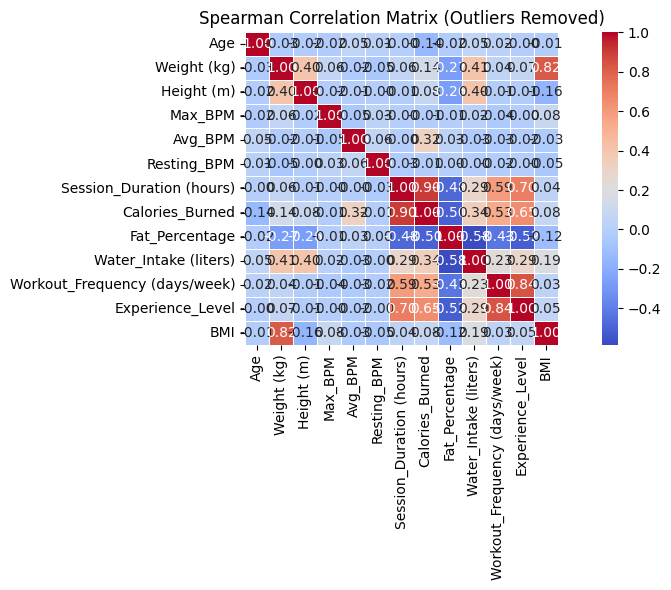

In [10]:
#HEATMAP WITH CORRELATION VALUES _ SPEARMAN
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    spearman_corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format to 2 decimals
    cmap="coolwarm",     # colour palette
    linewidths=0.5,
    square=True
)
plt.title("Spearman Correlation Matrix (Outliers Removed)")
plt.tight_layout()
plt.show()


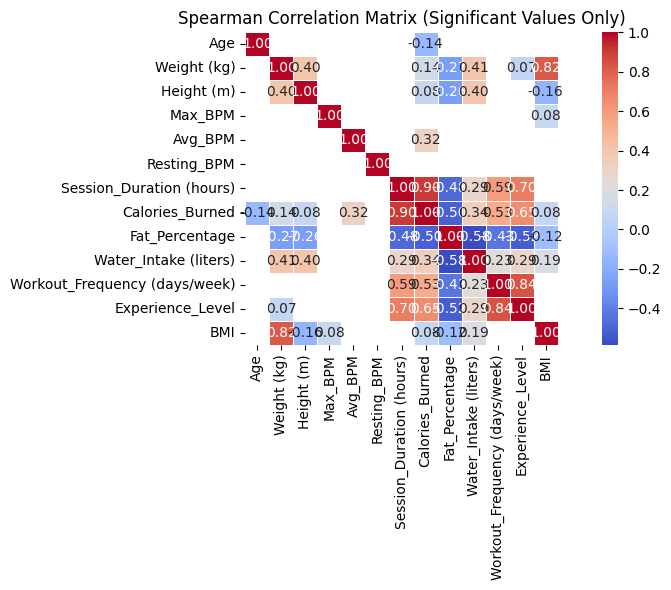

In [11]:
#HEATMAP WITH ONLY THE VALUES THAT ARE ASSOCIATED WITH P > 0.05
import numpy as np

# Mask non-significant correlations
mask = spearman_p > 0.05

plt.figure(figsize=(10, 6))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    mask=mask
)
plt.title("Spearman Correlation Matrix (Significant Values Only)")
plt.tight_layout()
plt.show()


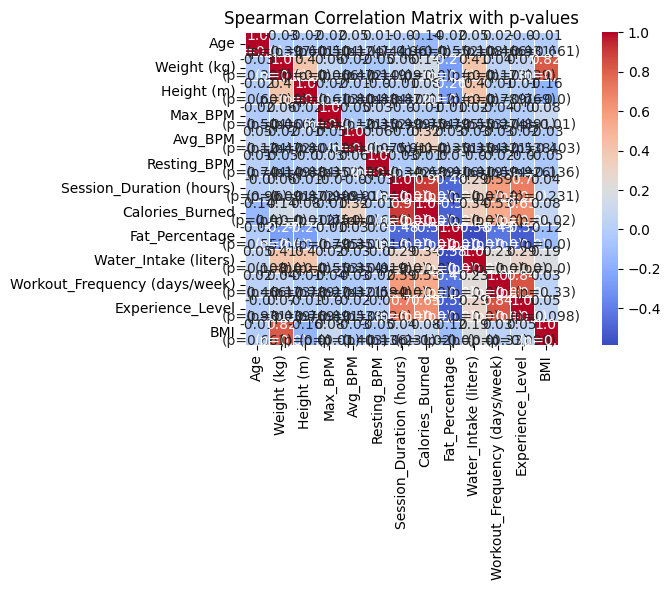

In [9]:
combined_text = spearman_corr.round(2).astype(str) + "\n(p=" + spearman_p.round(3).astype(str) + ")"

plt.figure(figsize=(10, 6))
sns.heatmap(
    spearman_corr,
    annot=combined_text,
    fmt="",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)
plt.title("Spearman Correlation Matrix with p-values")
plt.tight_layout()
plt.show()


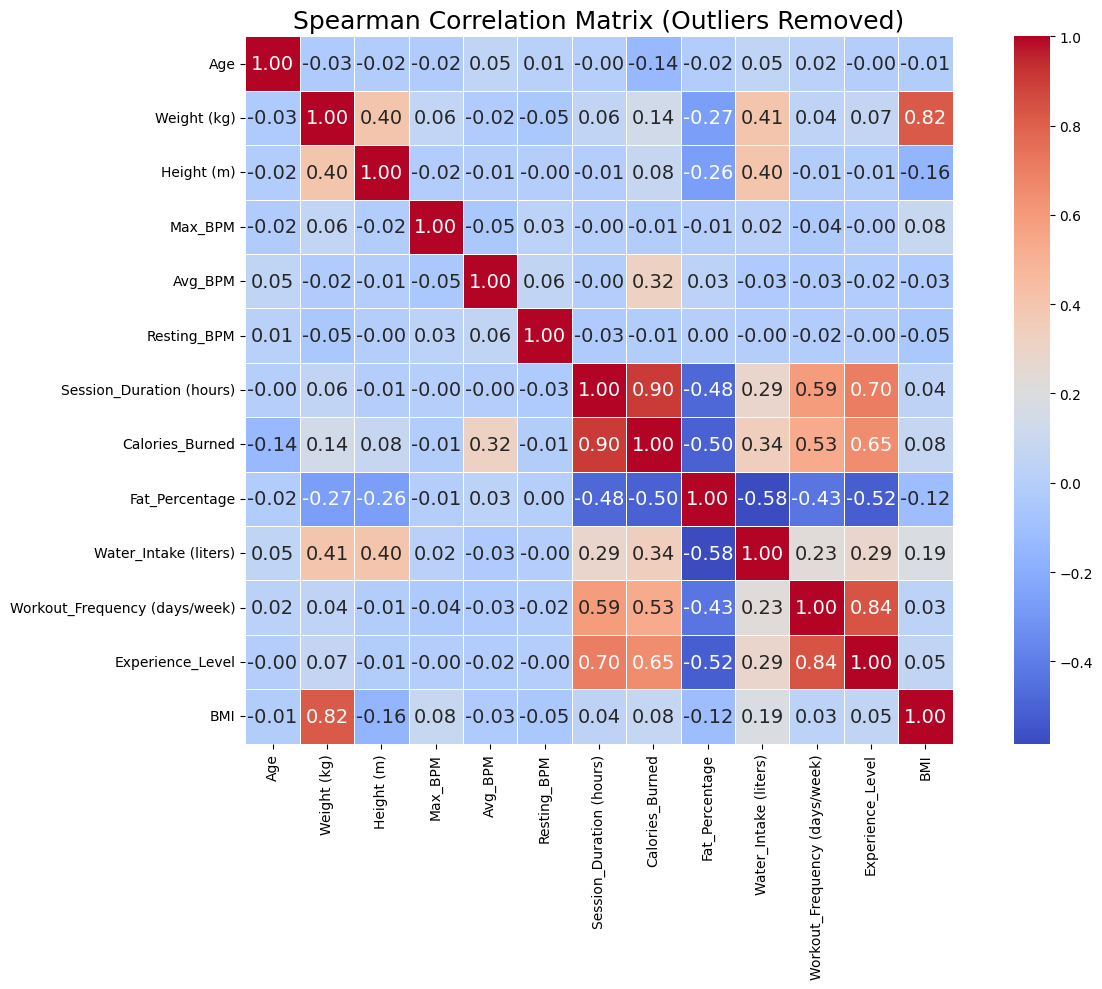

In [12]:
plt.figure(figsize=(14, 10))   # Bigger figure
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.7,
    square=True,
    annot_kws={"size": 14}     # Bigger text
)
plt.title("Spearman Correlation Matrix (Outliers Removed)", fontsize=18)
plt.tight_layout()
plt.show()


The heatmap that displays only significant correlations is showing you the variable pairs where the p‑value is below 0.05.<br>
<br>
This means that for those pairs, you have rejected the null hypothesis:<br>
H₀: There is no monotonic relationship between the two variables (ρ = 0).<br>
<br>
Because the p‑value is < 0.05, you have enough statistical evidence to say that the correlation is unlikely to be due to chance

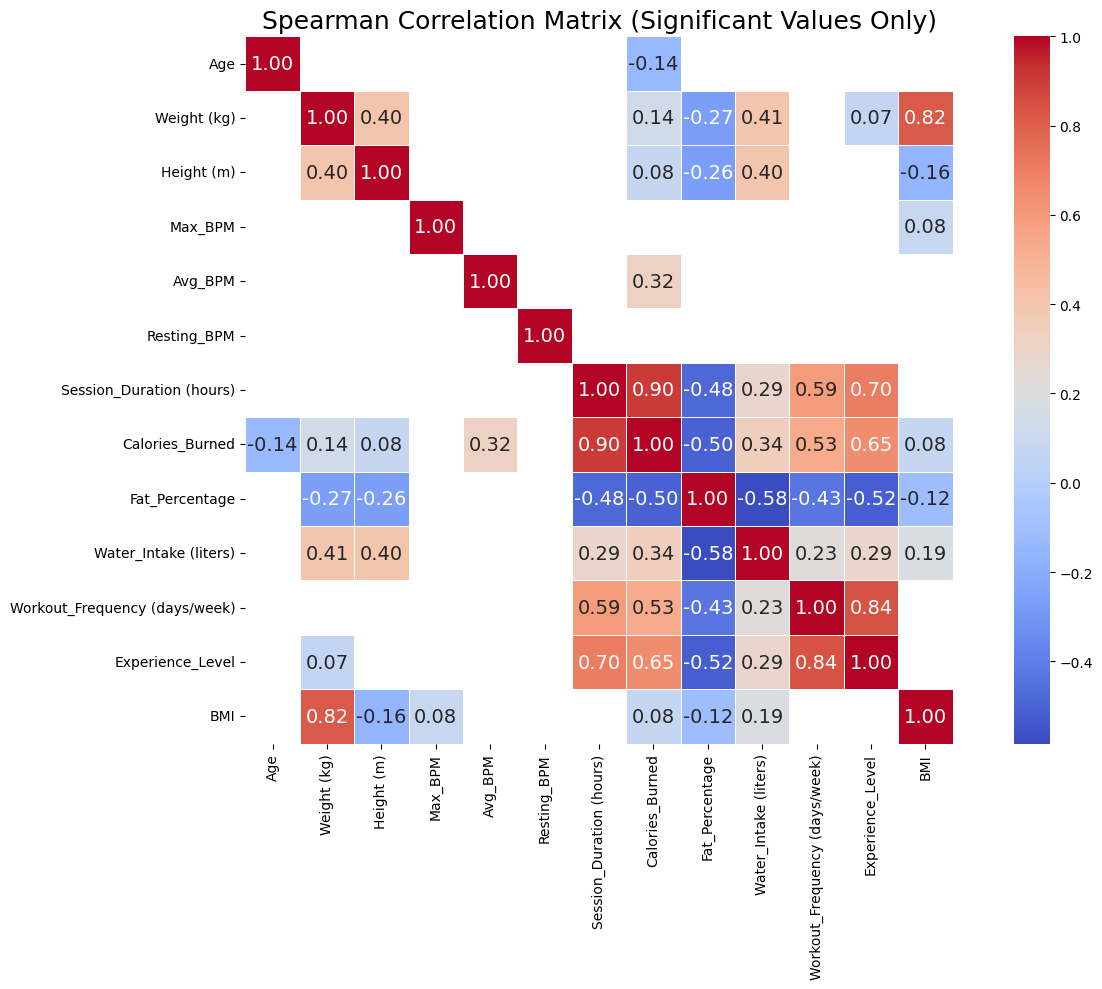

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.7,
    square=True,
    mask=(spearman_p > 0.05),
    annot_kws={"size": 14}
)
plt.title("Spearman Correlation Matrix (Significant Values Only)", fontsize=18)
plt.tight_layout()
plt.show()


Age<br>
Age vs Max_BPM → Negative correlation</br>
Older individuals tend to reach lower maximum heart rates during workouts.</br>

Age vs Avg_BPM → Negative correlation</br>
Average BPM also decreases with age, consistent with cardiovascular adaptation.</br>

Age vs Experience_Level → Positive correlation</br>
Older users tend to have more workout experience — possibly due to longer training history.</br></br>

Weight (kg)<br>
Weight vs BMI → Strong positive correlation</br>
Expected, since BMI is partially derived from weight.</br>

Weight vs Fat_Percentage → Positive correlation</br>
Heavier individuals tend to have higher body fat percentages.</br>

Weight vs Calories_Burned → Positive correlation</br>
Heavier users burn more calories, likely due to higher energy expenditure.</br><br>

Height (m)<br>
Height vs BMI → Negative correlation</br>
Taller individuals tend to have lower BMI, assuming similar weight.</br>

Height vs Fat_Percentage → Negative correlation</br>
Taller users may have leaner body composition.</br><br>
Max_BPM
Max_BPM vs Avg_BPM → Strong positive correlation</br>
Higher max BPM usually accompanies higher average BPM during sessions.</br>

Max_BPM vs Calories_Burned → Positive correlation</br>
Intense sessions (higher BPM) lead to more calories burned.</br><br>

Avg_BPM<br>
Avg_BPM vs Calories_Burned → Positive correlation</br>
Higher average heart rate is associated with greater energy output.</br><br>

Resting_BPM<br>
Resting_BPM vs Experience_Level → Negative correlation</br>
More experienced users tend to have lower resting BPM — a sign of cardiovascular fitness.</br><br>

Session_Duration (hours)<br>
Session_Duration vs Calories_Burned → Positive correlation</br>
Longer workouts burn more calories — expected and logical.</br>

Session_Duration vs Workout_Frequency → Positive correlation</br>
Users who train more often also tend to train longer per session.</br><br>

Calories_Burned<br>
Calories_Burned vs Fat_Percentage → Positive correlation</br>
Users with higher fat percentage may burn more calories due to higher effort or weight.</br><br>

Water_Intake (liters)<br>
Water_Intake vs Workout_Frequency → Positive correlation</br>
More frequent workouts lead to higher hydration needs.</br><br>

Workout_Frequency (days/week)<br>
Workout_Frequency vs Experience_Level → Positive correlation</br>
More experienced users train more often — consistent with disciplined routines.</br><br>

Experience_Level<br>
Experience_Level vs Resting_BPM → Negative correlation</br>
Reinforces the idea that training lowers resting heart rate.</br>

Experience_Level vs Workout_Frequency → Positive correlation</br>
Experience drives consistency in training habits.</br><br>

BMI<br>
BMI vs Fat_Percentage → Strong positive correlation</br>
Higher BMI is associated with higher body fat — expected and medically consistent.</br><br>

What this matrix tells you overall</br>
Cardiovascular metrics (Max_BPM, Avg_BPM, Resting_BPM) are tightly linked to age, experience, and calories burned.</br>

Body composition metrics (Weight, BMI, Fat_Percentage) form a strong internal cluster.</br>

Training metrics (Session_Duration, Workout_Frequency, Experience_Level) show logical, reinforcing relationships.</br>



Understanding p‑values in the context of your correlation analysis
The p‑value tells you whether the correlation you found is statistically significant — in other words, whether the relationship between the two variables is likely to be real rather than due to random chance.<br>
<br>

A p‑value < 0.05 means the correlation is statistically significant.<br>
This suggests that the relationship between the two variables is unlikely to be due to randomness.<br>
<br>

A p‑value ≥ 0.05 means the correlation is not statistically significant.<br>
This means you do not have enough evidence to say the variables are related in a meaningful way.<br>
<br>
The p‑value does not tell you how strong the relationship is — only whether it is statistically reliable.<br>

Understanding Spearman correlation values (ρ)
Spearman’s correlation coefficient (rho, ρ) measures the strength and direction of a monotonic relationship between two variables.<br>
It is ideal for non‑normal data, ranked data, or relationships that are not perfectly linear.<br>
<br>
The value of ρ ranges from –1 to +1:<br>
<br>

ρ = +1 → perfect positive monotonic relationship<br>

ρ = –1 → perfect negative monotonic relationship<br>

ρ = 0 → no monotonic relationship<br>
<br>
Interpretation guidelines:<br>

0.00–0.10 → very weak<br>

0.10–0.30 → weak<br>

0.30–0.50 → moderate<br>

> 0.50 → strong<br>
<br>
A high absolute value of ρ means a stronger relationship, but you still need the p‑value to confirm whether that relationship is statistically meaningful.<br>

Null Hypothesis (H₀)
There is no monotonic relationship between the two variables.  
In other words, the true Spearman correlation (ρ) is zero.<br>
<br>
H₀: ρ = 0<br>
Alternative Hypothesis (H₁)
There is a monotonic relationship between the two variables.  
The true Spearman correlation is not zero.<br>
<br>
H₁: ρ ≠ 0<br>
What the p‑value tells you
The p‑value answers the question:<br>
“If the true correlation were actually zero, what is the probability of observing a correlation as strong as the one we found?”<br>
<br>
If p < 0.05
You reject the null hypothesis.<br>
This means the correlation is statistically significant, and the relationship between the variables is unlikely to be due to chance.<br>
If p ≥ 0.05
You fail to reject the null hypothesis.<br>
This means the correlation is not statistically significant, and you do not have enough evidence to say the variables are related.<br>